###Figure 1 from Nature Food Clark et al., 2023 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import AutoMinorLocator

In [2]:
path = '/glade/p/univ/urtg0006/Brendan/clmcrop/climateallscen/co2/'
savedir = '/glade/p/univ/urtg0006/Brendan/nature_food_pdf_figs/'

In [4]:
SSP245 = xr.open_dataset(path + 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001.cam.h0.CO2.203501-206912.nc')
SSP534 = xr.open_dataset(path + 'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.20C.003.cam.h0.CO2.203201-209912.nc')
SSP585 = xr.open_dataset(path + 'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.003.cam.h0.CO2.202001-210012.nc')

In [7]:
filedir2 = '/glade/p/univ/urtg0006/Brendan/clmcrop/yield/year2000/'
filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/climateallscen/'
y4515 = xr.open_dataset(filedir2+'SSP245-15-AVG-b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h1.yield.203501-207012.nc')
in4515 = xr.open_dataset(filedir+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h0.TSA.203501-207012.nc')
y4515
carea = y4515['area'].sel(crops=0)
rarea = y4515['area'].sel(crops=3)
sarea = y4515['area'].sel(crops=6)
warea = y4515['area'].sel(crops=9)
area = carea + rarea + sarea + warea

landfrac = in4515.landfrac

arwt = area * landfrac
arwt_norm_sum = arwt/arwt.sum()
arwt_norm_sum.attrs['long_name'] = 'area weights normalized by sum'
arwt_norm_sum.attrs['units'] = ''

In [ ]:
#CO2
SSP245 = SSP245['CO2']
SSP245 = SSP245.sel(time=slice('2035-02-01', '2070-01-01'))
SSP245 = SSP245.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
SSP245 = SSP245.mean(dim=['lev'],skipna=True)
SSP245 = esmlab.statistics.weighted_mean(SSP245, dim=('lat','lon'), weights=arwt_norm_sum)
SSP245 = SSP245 * 1e6
SSP245 = SSP245.resample(time='1A').mean()

SSP534 = SSP534['CO2']
SSP534 = SSP534.sel(time=slice('2040-02-01', '2099-01-01'))
SSP534 = SSP534.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
SSP534 = SSP534.mean(dim=['lev'],skipna=True)
SSP534 = esmlab.statistics.weighted_mean(SSP534, dim=('lat','lon'), weights=arwt_norm_sum)
SSP534 = SSP534 * 1e6
SSP534 = SSP534.resample(time='1A').mean()

SSP585 = SSP585['CO2']
SSP585 = SSP585.sel(time=slice('2020-02-01', '2099-01-01'))
SSP585 = SSP585.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
SSP585 = SSP585.mean(dim=['lev'],skipna=True)
SSP585 = esmlab.statistics.weighted_mean(SSP585, dim=('lat','lon'), weights=arwt_norm_sum)
SSP585 = SSP585 * 1e6
SSP585 = SSP585.resample(time='1A').mean()

In [8]:
#TEMPERATURE
filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/climateallscen/'
in45 = xr.open_dataset(filedir+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.AVG.clm2.h0.TSA.201501-206912.nc')
in4515 = xr.open_dataset(filedir+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h0.TSA.203501-207012.nc')
in4505 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-1.0.AVG.clm2.h0.TSA.203501-207012.nc')
in4510 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-0.5.AVG.clm2.h0.TSA.203501-206912.nc')
in34 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.AVG.clm2.h0.TSA.204001-210012.nc')
in3415 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.15C.AVG.clm2.h0.TSA.204001-209912.nc')
in3420 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.20C.AVG.clm2.h0.TSA.204001-209912.nc')
in85 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.AVG.clm2.h0.TSA.201501-210012.nc')
in8515 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.AVG.clm2.h0.TSA.202001-210012.nc')
insol = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6solar-WACCM.AVG.clm2.h0.TSA.202001-210012.nc')
insul = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6sulfur-WACCM.AVG.clm2.h0.TSA.202001-210012.nc')

t45 = in45.sel(time=slice('2035-02-01', '2070-01-01'))
t45 = t45.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
t4515 = in4515.sel(time=slice('2035-02-01', '2070-01-01'))
t4515 = t4515.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
t4510 = in4510.sel(time=slice('2035-02-01', '2070-01-01'))
t4510 = t4510.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
t4505 = in4505.sel(time=slice('2035-02-01', '2070-01-01'))
t4505 = t4505.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
t34 = in34.sel(time=slice('2040-02-01', '2099-01-01'))
t34 = t34.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
t3415 = in3415.sel(time=slice('2040-02-01', '2099-01-01'))
t3415 = t3415.assign_coords(time = pd.date_range(start='2040-02-01', end='2099-01-01', freq='1M'))
t3420 = in3420.sel(time=slice('2040-02-01', '2099-01-01'))
t3420 = t3420.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
t85 = in85.sel(time=slice('2020-02-01', '2099-01-01'))
t85 = t85.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
t8515 = in8515.sel(time=slice('2020-02-01', '2099-01-01'))
t8515 = t8515.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
tsol = insol.sel(time=slice('2020-02-01', '2099-01-01'))
tsol = tsol.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
tsul = insul.sel(time=slice('2020-02-01', '2099-01-01'))
tsul = tsul.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))


ts45 = esmlab.statistics.weighted_mean(t45.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts4515 = esmlab.statistics.weighted_mean(t4515.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts4510 = esmlab.statistics.weighted_mean(t4510.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts4505 = esmlab.statistics.weighted_mean(t4505.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts34 = esmlab.statistics.weighted_mean(t34.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts3415 = esmlab.statistics.weighted_mean(t3415.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts3420 = esmlab.statistics.weighted_mean(t3420.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts85 = esmlab.statistics.weighted_mean(t85.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
ts8515 = esmlab.statistics.weighted_mean(t8515.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
tssol = esmlab.statistics.weighted_mean(tsol.TSA, dim=('lat','lon'), weights=arwt_norm_sum)
tssul = esmlab.statistics.weighted_mean(tsul.TSA, dim=('lat','lon'), weights=arwt_norm_sum)

#K to C
t45ym = ts45.resample(time='1A').mean()
t45ym = t45ym - 273.15
t4515ym = ts4515.resample(time='1A').mean()
t4515ym = t4515ym - 273.15
t4510ym = ts4510.resample(time='1A').mean()
t4510ym = t4510ym - 273.15
t4505ym = ts4505.resample(time='1A').mean()
t4505ym = t4505ym - 273.15
t34ym = ts34.resample(time='1A').mean()
t34ym = t34ym - 273.15
t3415ym = ts3415.resample(time='1A').mean()
t3415ym = t3415ym - 273.15
t3420ym = ts3420.resample(time='1A').mean()
t3420ym = t3420ym - 273.15
t85ym = ts85.resample(time='1A').mean()
t85ym = t85ym - 273.15
t8515ym = ts8515.resample(time='1A').mean()
t8515ym = t8515ym - 273.15
tsolym = tssol.resample(time='1A').mean()
tsolym = tsolym - 273.15
tsulym = tssul.resample(time='1A').mean()
tsulym = tsulym - 273.15

In [10]:
#PRECIPITATION
p45 = xr.open_dataset(filedir+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.AVG.clm2.h0.RAIN.201501-206912.nc')
p4515 = xr.open_dataset(filedir+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h0.RAIN.203501-207012.nc')
p4505 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-1.0.AVG.clm2.h0.RAIN.203501-207012.nc')
p4510 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-0.5.AVG.clm2.h0.RAIN.203501-206912.nc')
p34 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.AVG.clm2.h0.RAIN.204001-210012.nc')
p3415 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.15C.AVG.clm2.h0.RAIN.204001-209912.nc')
p3420 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.20C.AVG.clm2.h0.RAIN.203301-209912.nc')
p85 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.AVG.clm2.h0.RAIN.201501-210012.nc')
p8515 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.AVG.clm2.h0.RAIN.2020-2100.nc')
psol = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6solar-WACCM.AVG.clm2.h0.RAIN.202001-210012.nc')
psul = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6sulfur-WACCM.AVG.clm2.h0.RAIN.202001-210012.nc')

p45 = p45.sel(time=slice('2035-02-01', '2070-01-01'))
p45 = p45.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
p4515 = p4515.sel(time=slice('2035-02-01', '2070-01-01'))
p4515 = p4515.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
p4510 = p4510.sel(time=slice('2035-02-01', '2070-01-01'))
p4510 = p4510.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
p4505 = p4505.sel(time=slice('2035-02-01', '2070-01-01'))
p4505 = p4505.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
p34 = p34.sel(time=slice('2040-02-01', '2099-01-01'))
p34 = p34.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
p3415 = p3415.sel(time=slice('2040-02-01', '2099-01-01'))
p3415 = p3415.assign_coords(time = pd.date_range(start='2040-02-01', end='2099-01-01', freq='1M'))
p3420 = p3420.sel(time=slice('2040-02-01', '2099-01-01'))
p3420 = p3420.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
p85 = p85.sel(time=slice('2020-02-01', '2099-01-01'))
p85 = p85.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
p8515 = p8515.sel(time=slice('2020-02-01', '2099-01-01'))
p8515 = p8515.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
psol = psol.sel(time=slice('2020-02-01', '2099-01-01'))
psol = psol.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
psul = psul.sel(time=slice('2020-02-01', '2099-01-01'))
psul = psul.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))


ps45 = esmlab.statistics.weighted_mean(p45.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps45 = ps45.rolling(time=60, center=True).mean()
ps45 = ps45.sel(time=slice('2040-01-01', '2070-01-01'))
ps45 = ps45.assign_coords(time = pd.date_range(start='2040-01-01', end='2070-01-01', freq='1M'))
ps4515 = esmlab.statistics.weighted_mean(p4515.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps4515 = ps4515.rolling(time=60, center=True).mean()
ps4515 = ps4515.sel(time=slice('2040-01-01', '2070-01-01'))
ps4515 = ps4515.assign_coords(time = pd.date_range(start='2040-01-01', end='2070-01-01', freq='1M'))
ps4510 = esmlab.statistics.weighted_mean(p4510.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps4510 = ps4510.rolling(time=60, center=True).mean()
ps4510 = ps4510.sel(time=slice('2040-01-01', '2070-01-01'))
ps4510 = ps4510.assign_coords(time = pd.date_range(start='2040-01-01', end='2070-01-01', freq='1M'))
ps4505 = esmlab.statistics.weighted_mean(p4505.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps4505 = ps4505.rolling(time=60, center=True).mean()
ps4505 = ps4505.sel(time=slice('2040-01-01', '2070-01-01'))
ps4505 = ps4505.assign_coords(time = pd.date_range(start='2040-01-01', end='2070-01-01', freq='1M'))
ps34 = esmlab.statistics.weighted_mean(p34.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps34 = ps34.rolling(time=60, center=True).mean()
ps34 = ps34.sel(time=slice('2045-01-01', '2099-01-01'))
ps34 = ps34.assign_coords(time = pd.date_range(start='2045-01-01', end='2099-01-01', freq='1M'))
ps3415 = esmlab.statistics.weighted_mean(p3415.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps3415 = ps3415.rolling(time=60, center=True).mean()
ps3415 = ps3415.sel(time=slice('2045-01-01', '2099-01-01'))
ps3415 = ps3415.assign_coords(time = pd.date_range(start='2045-01-01', end='2099-01-01', freq='1M'))
ps3420 = esmlab.statistics.weighted_mean(p3420.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps3420 = ps3420.rolling(time=60, center=True).mean()
ps3420 = ps3420.sel(time=slice('2045-01-01', '2099-01-01'))
ps3420 = ps3420.assign_coords(time = pd.date_range(start='2045-01-01', end='2099-01-01', freq='1M'))
ps85 = esmlab.statistics.weighted_mean(p85.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps85 = ps85.rolling(time=60, center=True).mean()
ps85 = ps85.sel(time=slice('2025-01-01', '2099-01-01'))
ps85 = ps85.assign_coords(time = pd.date_range(start='2025-01-01', end='2099-01-01', freq='1M'))
ps8515 = esmlab.statistics.weighted_mean(p8515.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
ps8515 = ps8515.rolling(time=60, center=True).mean()
ps8515 = ps8515.sel(time=slice('2025-01-01', '2099-01-01'))
ps8515 = ps8515.assign_coords(time = pd.date_range(start='2025-01-01', end='2099-01-01', freq='1M'))
pssol = esmlab.statistics.weighted_mean(psol.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
pssol = pssol.rolling(time=60, center=True).mean()
pssol = pssol.sel(time=slice('2025-01-01', '2099-01-01'))
pssol = pssol.assign_coords(time = pd.date_range(start='2025-01-01', end='2099-01-01', freq='1M'))
pssul = esmlab.statistics.weighted_mean(psul.RAIN, dim=('lat','lon'), weights=arwt_norm_sum)
pssul = pssul.rolling(time=60, center=True).mean()
pssul = pssul.sel(time=slice('2025-01-01', '2099-01-01'))
pssul = pssul.assign_coords(time = pd.date_range(start='2025-01-01', end='2099-01-01', freq='1M'))
#mm/s to mm/day
p45ym = ps45.resample(time='1A').mean()
p45ym = p45ym * 86400 
p4515ym = ps4515.resample(time='1A').mean()
p4515ym = p4515ym * 86400 
p4510ym = ps4510.resample(time='1A').mean()
p4510ym = p4510ym * 86400 
p4505ym = ps4505.resample(time='1A').mean()
p4505ym = p4505ym * 86400 
p34ym = ps34.resample(time='1A').mean()
p34ym = p34ym * 86400 
p3415ym = ps3415.resample(time='1A').mean()
p3415ym = p3415ym * 86400 
p3420ym = ps3420.resample(time='1A').mean()
p3420ym = p3420ym * 86400 
p85ym = ps85.resample(time='1A').mean()
p85ym = p85ym * 86400 
p8515ym = ps8515.resample(time='1A').mean()
p8515ym = p8515ym * 86400 
psolym = pssol.resample(time='1A').mean()
psolym = psolym * 86400 
psulym = pssul.resample(time='1A').mean()
psulym = psulym * 86400 

/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
#SPECIFIC HUMIDITY
#filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/climateallscen/'
h45 = xr.open_dataset(filedir+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.AVG.clm2.h0.Q2M.201501-206912.nc')
h4515 = xr.open_dataset(filedir+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h0.Q2M.203501-207012.nc')
h4505 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-1.0.AVG.clm2.h0.Q2M.203501-207012.nc')
h4510 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-0.5.AVG.clm2.h0.Q2M.203501-206912.nc')
h34 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.AVG.clm2.h0.Q2M.204001-210012.nc')
h3415 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.15C.AVG.clm2.h0.Q2M.204001-210011.nc')
h3420 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.20C.AVG.clm2.h0.Q2M.203201-209912.nc')
h85 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.AVG.clm2.h0.Q2M.201501-210012.nc')
h8515 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.AVG.clm2.h0.Q2M.2020-2100.nc')
hsol = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6solar-WACCM.AVG.clm2.h0.Q2M.202001-210012.nc')
hsul = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6sulfur-WACCM.AVG.clm2.h0.Q2M.202001-210012.nc')

h45 = h45.sel(time=slice('2035-02-01', '2070-01-01'))
h45 = h45.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
h4515 = h4515.sel(time=slice('2035-02-01', '2070-01-01'))
h4515 = h4515.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
h4510 = h4510.sel(time=slice('2035-02-01', '2070-01-01'))
h4510 = h4510.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
h4505 = h4505.sel(time=slice('2035-02-01', '2070-01-01'))
h4505 = h4505.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
h34 = h34.sel(time=slice('2040-02-01', '2099-01-01'))
h34 = h34.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
h3415 = h3415.sel(time=slice('2040-02-01', '2099-01-01'))
h3415 = h3415.assign_coords(time = pd.date_range(start='2040-02-01', end='2099-01-01', freq='1M'))
h3420 = h3420.sel(time=slice('2040-02-01', '2099-01-01'))
h3420 = h3420.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
h85 = h85.sel(time=slice('2020-02-01', '2099-01-01'))
h85 = h85.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
h8515 = h8515.sel(time=slice('2020-02-01', '2099-01-01'))
h8515 = h8515.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
hsol = hsol.sel(time=slice('2020-02-01', '2099-01-01'))
hsol = hsol.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
hsul = hsul.sel(time=slice('2020-02-01', '2099-01-01'))
hsul = hsul.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))


hs45 = esmlab.statistics.weighted_mean(h45.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs4515 = esmlab.statistics.weighted_mean(h4515.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs4510 = esmlab.statistics.weighted_mean(h4510.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs4505 = esmlab.statistics.weighted_mean(h4505.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs34 = esmlab.statistics.weighted_mean(h34.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs3415 = esmlab.statistics.weighted_mean(h3415.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs3420 = esmlab.statistics.weighted_mean(h3420.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs85 = esmlab.statistics.weighted_mean(h85.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hs8515 = esmlab.statistics.weighted_mean(h8515.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hssol = esmlab.statistics.weighted_mean(hsol.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)
hssul = esmlab.statistics.weighted_mean(hsul.Q2M, dim=('lat','lon'), weights=arwt_norm_sum)

#kg/kg to g/kg
h45ym = hs45.resample(time='1A').mean()
h45ym = h45ym * 1000
h4515ym = hs4515.resample(time='1A').mean()
h4515ym = h4515ym * 1000
h4510ym = hs4510.resample(time='1A').mean()
h4510ym = h4510ym * 1000 
h4505ym = hs4505.resample(time='1A').mean()
h4505ym = h4505ym * 1000
h34ym = hs34.resample(time='1A').mean()
h34ym = h34ym * 1000
h3415ym = hs3415.resample(time='1A').mean()
h3415ym = h3415ym * 1000
h3420ym = hs3420.resample(time='1A').mean()
h3420ym = h3420ym * 1000
h85ym = hs85.resample(time='1A').mean()
h85ym = h85ym * 1000
h8515ym = hs8515.resample(time='1A').mean()
h8515ym = h8515ym * 1000
hsolym = hssol.resample(time='1A').mean()
hsolym = hsolym * 1000
hsulym = hssul.resample(time='1A').mean()
hsulym = hsulym * 1000

In [13]:
#DIRECT RADIATION
#filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/climateallscen/'
dir45 = xr.open_dataset(filedir+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.AVG.clm2.h0.FSDS.201501-206912.nc')
dir4515 = xr.open_dataset(filedir+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h0.FSDS.203501-207012.nc')
dir4505 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-1.0.AVG.clm2.h0.FSDS.203501-207012.nc')
dir4510 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-0.5.AVG.clm2.h0.FSDS.203501-206912.nc')
dir34 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.AVG.clm2.h0.FSDS.204001-210012.nc')
dir3415 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.15C.AVG.clm2.h0.FSDS.204001-210011.nc')
dir3420 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.20C.AVG.clm2.h0.FSDS.203201-209912.nc')
dir85 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.AVG.clm2.h0.FSDS.201501-210012.nc')
dir8515 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.AVG.clm2.h0.FSDS.2020-2100.nc')
dirsol = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6solar-WACCM.AVG.clm2.h0.FSDS.202001-210012.nc')
dirsul = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6sulfur-WACCM.AVG.clm2.h0.FSDS.202001-210012.nc')

dir45 = dir45.sel(time=slice('2035-02-01', '2070-01-01'))
dir45 = dir45.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dir4515 = dir4515.sel(time=slice('2035-02-01', '2070-01-01'))
dir4515 = dir4515.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dir4510 = dir4510.sel(time=slice('2035-02-01', '2070-01-01'))
dir4510 = dir4510.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dir4505 = dir4505.sel(time=slice('2035-02-01', '2070-01-01'))
dir4505 = dir4505.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dir34 = dir34.sel(time=slice('2040-02-01', '2099-01-01'))
dir34 = dir34.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
dir3415 = dir3415.sel(time=slice('2041-02-01', '2099-01-01'))
dir3415 = dir3415.assign_coords(time = pd.date_range(start='2041-01-01', end='2099-01-01', freq='1M'))
dir3420 = dir3420.sel(time=slice('2040-02-01', '2099-01-01'))
dir3420 = dir3420.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
dir85 = dir85.sel(time=slice('2020-02-01', '2099-01-01'))
dir85 = dir85.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
dir8515 = dir8515.sel(time=slice('2020-02-01', '2099-01-01'))
dir8515 = dir8515.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
dirsol = dirsol.sel(time=slice('2020-02-01', '2099-01-01'))
dirsol = dirsol.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
dirsul = dirsul.sel(time=slice('2020-02-01', '2099-01-01'))
dirsul = dirsul.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))


dirs45 = esmlab.statistics.weighted_mean(dir45.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs4515 = esmlab.statistics.weighted_mean(dir4515.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs4510 = esmlab.statistics.weighted_mean(dir4510.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs4505 = esmlab.statistics.weighted_mean(dir4505.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs34 = esmlab.statistics.weighted_mean(dir34.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs3415 = esmlab.statistics.weighted_mean(dir3415.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs3420 = esmlab.statistics.weighted_mean(dir3420.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs85 = esmlab.statistics.weighted_mean(dir85.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirs8515 = esmlab.statistics.weighted_mean(dir8515.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirssol = esmlab.statistics.weighted_mean(dirsol.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)
dirssul = esmlab.statistics.weighted_mean(dirsul.FSDS, dim=('lat','lon'), weights=arwt_norm_sum)

dir45ym = dirs45.resample(time='1A').mean()
dir45ym = dir45ym
dir4515ym = dirs4515.resample(time='1A').mean()
dir4515ym = dir4515ym 
dir4510ym = dirs4510.resample(time='1A').mean()
dir4510ym = dir4510ym 
dir4505ym = dirs4505.resample(time='1A').mean()
dir4505ym = dir4505ym
dir34ym = dirs34.resample(time='1A').mean()
dir34ym = dir34ym
dir3415ym = dirs3415.resample(time='1A').mean()
dir3415ym = dir3415ym 
dir3420ym = dirs3420.resample(time='1A').mean()
dir3420ym = dir3420ym 
dir85ym = dirs85.resample(time='1A').mean()
dir85ym = dir85ym 
dir8515ym = dirs8515.resample(time='1A').mean()
dir8515ym = dir8515ym
dirsolym = dirssol.resample(time='1A').mean()
dirsolym = dirsolym 
dirsulym = dirssul.resample(time='1A').mean()
dirsulym = dirsulym

In [14]:
#DIFFUSE RADIATION
#filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/climateallscen/'
dif45 = xr.open_dataset(filedir+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.AVG.clm2.h0.FSDSVI.201501-206912.nc')
dif4515 = xr.open_dataset(filedir+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.AVG.clm2.h0.FSDSVI.203501-207012.nc')
dif4505 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-1.0.AVG.clm2.h0.FSDSVI.203501-207012.nc')
dif4510 = xr.open_dataset(filedir+'b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.SSP245-MA-GAUSS-LOWER-0.5.AVG.clm2.h0.FSDSVI.203501-206912.nc')
dif34 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.AVG.clm2.h0.FSDSVI.204001-210012.nc')
dif3415 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.15C.AVG.clm2.h0.FSDSVI.204001-210011.nc')
dif3420 = xr.open_dataset(filedir+'b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WACCM.feedback.20C.AVG.clm2.h0.FSDSVI.203201-209912.nc')
dif85 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.AVG.clm2.h0.FSDSVI.201501-210012.nc')
dif8515 = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.AVG.clm2.h0.FSDSVI.2020-2100.nc')
difsol = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6solar-WACCM.AVG.clm2.h0.FSDSVI.202001-210012.nc')
difsul = xr.open_dataset(filedir+'b.e21.BWSSP585cmip6.f09_g17.CMIP6-G6sulfur-WACCM.AVG.clm2.h0.FSDSVI.202001-210012.nc')

dif45 = dif45.sel(time=slice('2035-02-01', '2070-01-01'))
dif45 = dif45.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dif4515 = dif4515.sel(time=slice('2035-02-01', '2070-01-01'))
dif4515 = dif4515.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dir4510 = dif4510.sel(time=slice('2035-02-01', '2070-01-01'))
dif4510 = dif4510.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dif4505 = dif4505.sel(time=slice('2035-02-01', '2070-01-01'))
dif4505 = dif4505.assign_coords(time = pd.date_range(start='2035-01-01', end='2070-01-01', freq='1M'))
dif34 = dif34.sel(time=slice('2040-02-01', '2099-01-01'))
dif34 = dif34.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
dif3415 = dif3415.sel(time=slice('2041-02-01', '2099-01-01'))
dif3415 = dif3415.assign_coords(time = pd.date_range(start='2041-01-01', end='2099-01-01', freq='1M'))
dif3420 = dif3420.sel(time=slice('2040-02-01', '2099-01-01'))
dif3420 = dif3420.assign_coords(time = pd.date_range(start='2040-01-01', end='2099-01-01', freq='1M'))
dif85 = dif85.sel(time=slice('2020-02-01', '2099-01-01'))
dif85 = dif85.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
dif8515 = dif8515.sel(time=slice('2020-02-01', '2099-01-01'))
dif8515 = dif8515.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
difsol = difsol.sel(time=slice('2020-02-01', '2099-01-01'))
difsol = difsol.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))
difsul = difsul.sel(time=slice('2020-02-01', '2099-01-01'))
difsul = difsul.assign_coords(time = pd.date_range(start='2020-01-01', end='2099-01-01', freq='1M'))


difs45 = esmlab.statistics.weighted_mean(dif45.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs4515 = esmlab.statistics.weighted_mean(dif4515.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs4510 = esmlab.statistics.weighted_mean(dif4510.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs4505 = esmlab.statistics.weighted_mean(dif4505.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs34 = esmlab.statistics.weighted_mean(dif34.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs3415 = esmlab.statistics.weighted_mean(dif3415.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs3420 = esmlab.statistics.weighted_mean(dif3420.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs85 = esmlab.statistics.weighted_mean(dif85.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difs8515 = esmlab.statistics.weighted_mean(dif8515.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difssol = esmlab.statistics.weighted_mean(difsol.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)
difssul = esmlab.statistics.weighted_mean(difsul.FSDSVI, dim=('lat','lon'), weights=arwt_norm_sum)

dif45ym = difs45.resample(time='1A').mean()
dif45ym = dif45ym
dif4515ym = difs4515.resample(time='1A').mean()
dif4515ym = dif4515ym 
dif4510ym = difs4510.resample(time='1A').mean()
dif4510ym = dif4510ym 
dif4505ym = difs4505.resample(time='1A').mean()
dif4505ym = dif4505ym
dif34ym = difs34.resample(time='1A').mean()
dif34ym = dif34ym
dif3415ym = difs3415.resample(time='1A').mean()
dif3415ym = dif3415ym 
dif3420ym = difs3420.resample(time='1A').mean()
dif3420ym = dif3420ym 
dif85ym = difs85.resample(time='1A').mean()
dif85ym = dif85ym 
dif8515ym = difs8515.resample(time='1A').mean()
dif8515ym = dif8515ym
difsolym = difssol.resample(time='1A').mean()
difsolym = difsolym 
difsulym = difssul.resample(time='1A').mean()
difsulym = difsulym

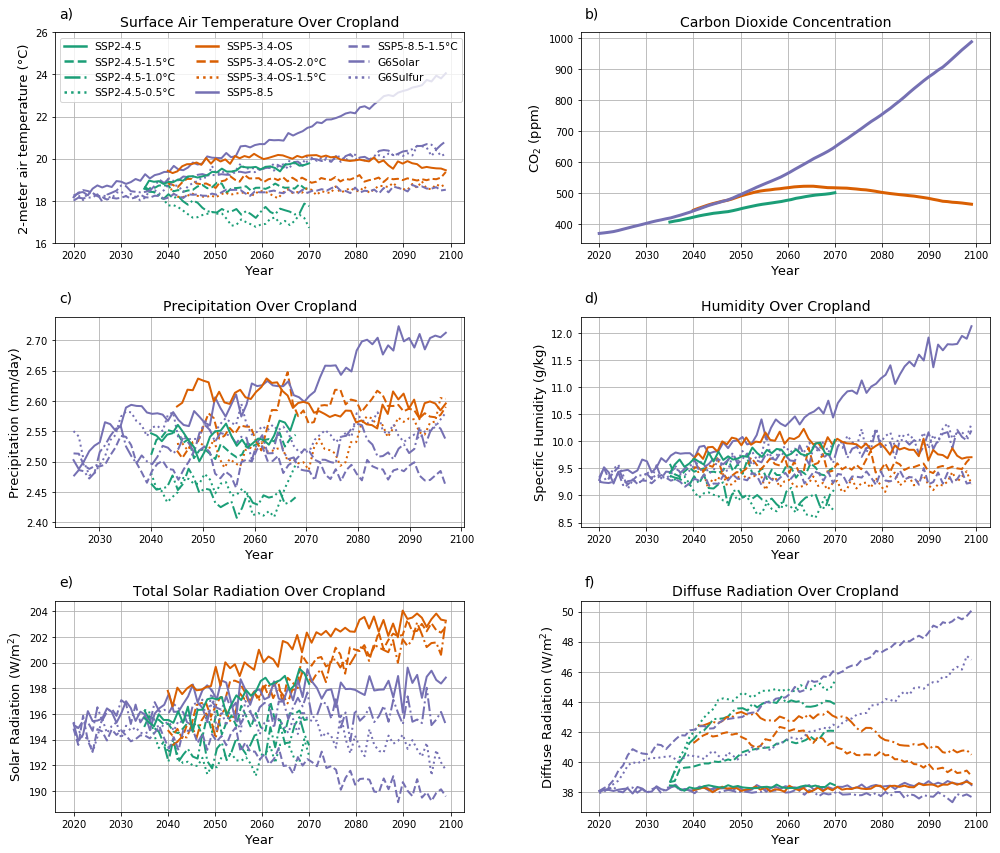

In [22]:
fig = plt.figure()
fig.set_size_inches(14,12)
time45 = np.linspace(2035, 2070, 35)
time85 = np.linspace(2020, 2099, 79)
time34 = np.linspace(2040, 2099, 59)
time3415 = np.linspace(2041, 2099, 58)
time45_p = np.linspace(2040, 2070, 30)
time34_p = np.linspace(2045, 2099, 54)
time85_p = np.linspace(2025, 2099, 74)
ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(time45,t45ym,color ='#1b9e77', linewidth=2, label="SSP2-4.5",zorder=4)
ax1.plot(time45,t4515ym,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C")
ax1.plot(time45,t4510ym,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C")
ax1.plot(time45,t4505ym,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C")
ax1.plot(time34,t34ym,color ='#d95f02',linewidth=2,linestyle='solid',label="SSP5-3.4-OS",zorder=3)
ax1.plot(time34,t3420ym,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C")
ax1.plot(time34,t3415ym,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C")
ax1.plot(time85,t85ym,color ='#7570b3',linewidth=2, label="SSP5-8.5",zorder=2)
ax1.plot(time85,t8515ym,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C")
ax1.plot(time85,tsolym,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar")
ax1.plot(time85,tsulym,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur")
ax1.grid(zorder=0)
leg = ax1.legend(loc="upper left",ncol=3,fontsize=10.6)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)
ax1.set_ylim(16,26)
ax1.set_ylabel('2-meter air temperature (°C)',fontsize=13)
ax1.set_xlabel('Year',fontsize=13)
ax1.text(0.01, 1.07, 'a)', transform=ax1.transAxes, size=14)
ax1.set_title('Surface Air Temperature Over Cropland',fontsize=14)

ax2 = fig.add_subplot(3, 2, 2)
ax2.plot(time45,SSP245,color ='#1b9e77',linewidth=3,label="SSP2-4.5")
ax2.plot(time34,SSP534,color ='#d95f02',linewidth=3,label="SSP5-3.4-OS")
ax2.plot(time85,SSP585,color ='#7570b3',linewidth=3,label="SSP5-8.5")
plt.grid()
plt.ylabel('CO$_\mathrm{2}$ (ppm)',fontsize=13)
plt.xlabel('Year',fontsize=13)
ax2.text(0.01, 1.07, 'b)', transform=ax2.transAxes, size=14)
plt.title('Carbon Dioxide Concentration',fontsize=14)

ax3 = fig.add_subplot(3, 2, 3)
ax3.plot(time45_p,p45ym,color ='#1b9e77', linewidth=2, label="SSP2-4.5",zorder=4)
ax3.plot(time45_p,p4515ym,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C")
ax3.plot(time45_p,p4510ym,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C")
ax3.plot(time45_p,p4505ym,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C")
ax3.plot(time34_p,p34ym,color ='#d95f02',linewidth=2,linestyle='solid',label="SSP5-3.4-OS",zorder=3)
ax3.plot(time34_p,p3420ym,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C")
ax3.plot(time34_p,p3415ym,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C")
ax3.plot(time85_p,p85ym,color ='#7570b3',linewidth=2, label="SSP5-8.5",zorder=2)
ax3.plot(time85_p,p8515ym,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C")
ax3.plot(time85_p,psolym,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar")
ax3.plot(time85_p,psulym,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur")
ax3.grid(zorder=0)
plt.ylabel('Precipitation (mm/day)',fontsize=13)
plt.xlabel('Year',fontsize=13)
ax3.text(0.01, 1.07, 'c)', transform=ax3.transAxes, size=14)
plt.title('Precipitation Over Cropland',fontsize=14)

ax4 = fig.add_subplot(3, 2, 4)
ax4.plot(time45,h45ym,color ='#1b9e77', linewidth=2, label="SSP2-4.5",zorder=4)
ax4.plot(time45,h4515ym,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C")
ax4.plot(time45,h4510ym,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C")
ax4.plot(time45,h4505ym,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C")
ax4.plot(time34,h34ym,color ='#d95f02',linewidth=2,label="SSP5-3.4-OS",zorder=3)
ax4.plot(time34,h3420ym,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C")
ax4.plot(time34,h3415ym,color ='#d95f02',linewidth=2,  linestyle='dotted', label="SSP5-3.4-OS-1.5°C")
ax4.plot(time85,h85ym,color ='#7570b3',linewidth=2, label="SSP5-8.5",zorder=2)
ax4.plot(time85,h8515ym,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C")
ax4.plot(time85,hsolym,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar")
ax4.plot(time85,hsulym,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur")
ax4.grid(zorder=0)
plt.ylabel('Specific Humidity (g/kg)',fontsize=13)
plt.xlabel('Year',fontsize=13)
ax4.text(0.01, 1.07, 'd)', transform=ax4.transAxes, size=14)
plt.title('Humidity Over Cropland',fontsize=14)

ax5 = fig.add_subplot(3, 2, 5)
ax5.plot(time45,dir45ym,color ='#1b9e77', linewidth=2, label="SSP2-4.5",zorder=4)
ax5.plot(time45,dir4515ym,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C")
ax5.plot(time45,dir4510ym,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C")
ax5.plot(time45,dir4505ym,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C")
ax5.plot(time34,dir34ym,color ='#d95f02',linewidth=2,label="SSP5-3.4-OS",zorder=3)
ax5.plot(time34,dir3420ym,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C")
ax5.plot(time3415,dir3415ym,color ='#d95f02',linewidth=2,  linestyle='dashdot', label="SSP5-3.4-OS-1.5°C")
ax5.plot(time85,dir85ym,color ='#7570b3',linewidth=2, label="SSP5-8.5",zorder=2)
ax5.plot(time85,dir8515ym,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C")
ax5.plot(time85,dirsolym,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar")
ax5.plot(time85,dirsulym,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur")
ax5.grid(zorder=0)
plt.ylabel(r'Solar Radiation ($\mathrm{W/m^2}$)',fontsize=13)
plt.xlabel('Year',fontsize=13)
ax5.text(0.01, 1.07, 'e)', transform=ax5.transAxes, size=14)
plt.title('Total Solar Radiation Over Cropland',fontsize=14)

ax6 = fig.add_subplot(3, 2, 6)
ax6.plot(time45,dif45ym,color ='#1b9e77', linewidth=2, label="SSP2-4.5",zorder=4)
ax6.plot(time45,dif4515ym,color ='#1b9e77', linewidth=2, linestyle='dashed', label="SSP2-4.5-1.5°C")
ax6.plot(time45,dif4510ym,color ='#1b9e77', linewidth=2, linestyle='dashdot', label="SSP2-4.5-1.0°C")
ax6.plot(time45,dif4505ym,color ='#1b9e77', linewidth=2, linestyle='dotted', label="SSP2-4.5-0.5°C")
ax6.plot(time34,dif34ym,color ='#d95f02',linewidth=2,label="SSP5-3.4-OS",zorder=3)
ax6.plot(time34,dif3420ym,color ='#d95f02', linewidth=2, linestyle='dashed', label="SSP5-3.4-OS-2.0°C")
ax6.plot(time3415,dif3415ym,color ='#d95f02',linewidth=2,  linestyle='dashdot', label="SSP5-3.4-OS-1.5°C")
ax6.plot(time85,dif85ym,color ='#7570b3',linewidth=2, label="SSP5-8.5",zorder=2)
ax6.plot(time85,dif8515ym,color ='#7570b3', linewidth=2, linestyle='dashed', label="SSP5-8.5-1.5°C")
ax6.plot(time85,difsolym,color ='#7570b3',linewidth=2, linestyle='dashdot', label="G6Solar")
ax6.plot(time85,difsulym,color ='#7570b3',linewidth=2, linestyle='dotted',label="G6Sulfur")
ax6.grid(zorder=0)
plt.ylabel(r'Diffuse Radiation ($\mathrm{W/m^2}$)',fontsize=13)
plt.xlabel('Year',fontsize=13)
ax6.text(0.01, 1.07, 'f)', transform=ax6.transAxes, size=14)
plt.title('Diffuse Radiation Over Cropland',fontsize=14)

plt.subplots_adjust(wspace=0.2,hspace=-0.1,top=.95)
plt.tight_layout()
plt.savefig(savedir+'/clim_allscen.png', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )